In [137]:
import random
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.ticker import FixedLocator, FixedFormatter

Interpretacja: \
**% Optimal Action** - Przeprowadzamy 500 gier. Za każdym razem zaczynamy od wartości tablicy action-value (Q) wynoszących 5 dla wersji greedy i 0 dla wersji eps-greedy. W każdej z gier wybór automatu wykonywany jest 1000 razy (1000 time-steps, oznaczane jako *t* ). Dla każdego t liczymy procent gier, w których podczas wyboru numer t algorytm wybrał najlepszy automat (czyli (liczba wyborów pierwszego automatu/liczba gier)\*100% dla każdego t). \
\
Dzięki temu dla *t=1* wartość **% Optimal Action** będzie wynosiła około 10%, ze względu na to, że automatów jest 10, a w pierszym ruchu automat wybierany jest losowo. Tak też wyglądają wykresy w książce "Reinforcement Learning: An Introduction" Sutton, Barto.

In [121]:
alpha = 0.1 # parametr szybkości uczenia
eps = 0.1 # parametr eksploracji
n = 10 # liczba bandytów
T = 1000 # liczba akcji wyboru
optimal_action_count = [0]*T # tablica dla 1000 stepów
optimal_action_count_eps = [0]*T
ngames = 500
random.seed(420)

In [122]:
for r in range(ngames):
    Q = np.array([5.0]*n) # tablica estymatorów wartości danego bandyty dla opt-greedy
    Qeps = np.array([0.0]*n) # tablica estymatorów wartości danego bandyty dla eps-greedy
    
    for t in range(T):
        # Wybór bandyty 
        # Optimistic  Greedy
        A = np.argwhere(Q == np.amax(Q)).flatten().tolist()
        if(len(A) > 1):
            j = randint(0,len(A)-1)
            A = A[j]
        else:
            A = np.array(A).astype(int).item()
        # Eps-greedy
        e = uniform(0,1)
        if(e <= eps):
            Aeps = randint(0,9)
        else:
            Aeps = np.argwhere(Qeps == np.amax(Qeps)).flatten().tolist()
            if(len(Aeps) > 1):
                j = randint(0,len(Aeps)-1)
                Aeps = Aeps[j]
            else:
                Aeps = np.array(Aeps).astype(int).item()
        
        # Losowanie nagrody i aktualizacja tablicy Q
        if(A == 0):
            R = gauss(1,1)
            optimal_action_count[t] += 1
        else:
            R = gauss(0,1)
        if(Aeps == 0):
            Reps = gauss(1,1)
            optimal_action_count_eps[t] += 1
        else:
            Reps = gauss(0,1)
            
        Q[A] = Q[A] + alpha * (R - Q[A])
        Qeps[Aeps] = Qeps[Aeps] + alpha * (Reps - Qeps[Aeps])

In [123]:
optimal_action_count = [(c/ngames)*100 for c in optimal_action_count]
optimal_action_count_eps = [(c/ngames)*100 for c in optimal_action_count_eps]
for i in range(T):
    print(f"Ruch numer: {i+1}. % optymalnych akcji: {optimal_action_count[i]}")
print("EPSILON GREEDY")
for i in range(T):
    print(f"Ruch numer: {i+1}. % optymalnych akcji: {optimal_action_count_eps[i]}")

Ruch numer: 1. % optymalnych akcji: 8.6
Ruch numer: 2. % optymalnych akcji: 11.0
Ruch numer: 3. % optymalnych akcji: 12.8
Ruch numer: 4. % optymalnych akcji: 7.199999999999999
Ruch numer: 5. % optymalnych akcji: 7.3999999999999995
Ruch numer: 6. % optymalnych akcji: 10.4
Ruch numer: 7. % optymalnych akcji: 9.6
Ruch numer: 8. % optymalnych akcji: 9.2
Ruch numer: 9. % optymalnych akcji: 12.6
Ruch numer: 10. % optymalnych akcji: 11.200000000000001
Ruch numer: 11. % optymalnych akcji: 33.800000000000004
Ruch numer: 12. % optymalnych akcji: 21.0
Ruch numer: 13. % optymalnych akcji: 11.600000000000001
Ruch numer: 14. % optymalnych akcji: 11.0
Ruch numer: 15. % optymalnych akcji: 7.6
Ruch numer: 16. % optymalnych akcji: 6.0
Ruch numer: 17. % optymalnych akcji: 7.000000000000001
Ruch numer: 18. % optymalnych akcji: 5.4
Ruch numer: 19. % optymalnych akcji: 5.4
Ruch numer: 20. % optymalnych akcji: 10.6
Ruch numer: 21. % optymalnych akcji: 28.799999999999997
Ruch numer: 22. % optymalnych akcji: 2

Ruch numer: 784. % optymalnych akcji: 90.4
Ruch numer: 785. % optymalnych akcji: 90.4
Ruch numer: 786. % optymalnych akcji: 93.0
Ruch numer: 787. % optymalnych akcji: 90.60000000000001
Ruch numer: 788. % optymalnych akcji: 90.60000000000001
Ruch numer: 789. % optymalnych akcji: 89.0
Ruch numer: 790. % optymalnych akcji: 89.4
Ruch numer: 791. % optymalnych akcji: 89.0
Ruch numer: 792. % optymalnych akcji: 88.8
Ruch numer: 793. % optymalnych akcji: 90.8
Ruch numer: 794. % optymalnych akcji: 91.4
Ruch numer: 795. % optymalnych akcji: 89.2
Ruch numer: 796. % optymalnych akcji: 92.0
Ruch numer: 797. % optymalnych akcji: 90.4
Ruch numer: 798. % optymalnych akcji: 91.0
Ruch numer: 799. % optymalnych akcji: 91.0
Ruch numer: 800. % optymalnych akcji: 90.2
Ruch numer: 801. % optymalnych akcji: 88.4
Ruch numer: 802. % optymalnych akcji: 90.2
Ruch numer: 803. % optymalnych akcji: 90.60000000000001
Ruch numer: 804. % optymalnych akcji: 89.8
Ruch numer: 805. % optymalnych akcji: 90.0
Ruch numer: 806

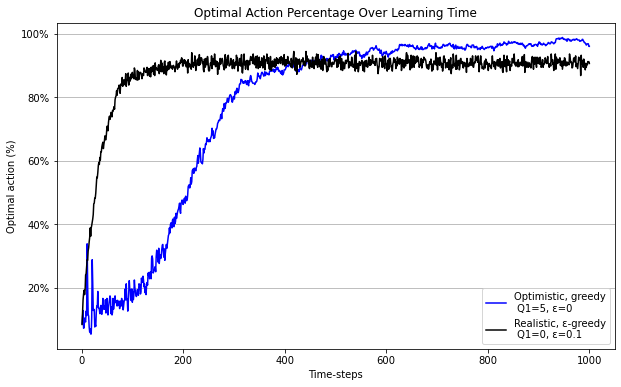

In [145]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 1001), optimal_action_count, color='blue', label='Optimistic, greedy\n Q1=5, \u03B5=0')
plt.plot(range(1, 1001), optimal_action_count_eps, color='black', label='Realistic, \u03B5-greedy\n Q1=0, \u03B5=0.1')
plt.xlabel('Time-steps')
plt.ylabel('Optimal action (%)')
plt.title('Optimal Action Percentage Over Learning Time')
plt.legend()
plt.grid(axis='y')
plt.gca().yaxis.set_major_locator(FixedLocator(plt.gca().get_yticks()))
plt.gca().yaxis.set_major_formatter(FixedFormatter(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()]))
# plt.savefig("OptimalActionPercGreedy.png", dpi = 300)
plt.show()